<a href="https://colab.research.google.com/github/majorquev/DBDC_202106_Programacion_en_R_para_ciencia_de_datos/blob/main/Clases/Clase7/Clase7_1_Distribuciones_de_probabilidad_en_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 6: Distribuciones de probabilidad

**Autor:** Miguel Jorquera Viguera.<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Jorge Arévalo Labarca<br>
**E-mail ayudante:** jorge.arevalol@usach.cl

En R podemos obtener valores tanto de las funciones de densidad, distribución de probabilidad, cuantiles de una distribución o bien generar valores aleatorios de diversas distribuciones paramétricas.
Casi todas las distribuciones que se encuentran implementadas en la librería base de R se referencian de la misma manera.

* Funciones de densidad (PDFs) comienzan con la letra “d.”
* Funciones de distribución acumulada comienzan con la letra “p.”
* Funcioenes que retornan quantiles de una distribución comienzan con la letra “q.”
* Funciones que generan valores aleatorios comienzan con la letra“r.” 

Por defecto, en R contamos con una amplia variedad familias de distribuciones enre las que destacan las siguientes.



**Distribution**| **R name**| **additional arguments**
-----| -----| -----
beta |`beta` |shape1, shape2, ncp
binomial| `binom`| size, prob
Cauchy|`cauchy` |location, scale
chi-squared| `chisq`| df, ncp
exponential| `exp` |rate
F| `f` |df1, df2, ncp
gamma |`gamma` |shape, scale
geometric |`geom` |prob
hypergeometric| `hyper`| m, n, k
log-normal| `lnorm` |meanlog, sdlog
logistic |`logis` |location, scale
negative| `binomial`| nbinom size, prob
normal |`norm` |mean, sd
Poisson| `pois`| lambda
signed rank |`signrank`| n
Student’s t| `t`| df, ncp
uniform |`unif`| min, max
Weibull| `weibull`| shape, scale
Wilcoxon |`wilcox`|m, n




# I) Distribución normal

## Función de densidad
$$f(x) = \frac{1}{\sqrt{2 π \sigma^2}} e^{-\frac{1}{2\sigma^2}(x - \mu)^2}$$

## En R...

* `dnorm(x, mean = 0, sd = 1, log = FALSE)`: Evalúa la función de densidad.
* `pnorm(q, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)`: Calcula la probabilidad acumulada (función de distribución).
* `qnorm(p, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)`: Calcula los quantiles de la distribución. (Función inversa de la función de distribución de probabilidad).
* `rnorm(n, mean = 0, sd = 1)`: Genera muestras aleatroias.




**P1.** Se sabe que la estatura de la población adulta de sexo masculino chilena sigue una distribución normal con media 171,8 cms y una desviación estándar de 5cms

**a)** ¿Cuál es la probabilidad de encontrar de que una persona hombre  adulta tenga una estatura
menor o igual a 160 cms?

In [1]:
# pnorm()
#?pnorm
pnorm(160, mean = 171.8, sd = 5) # P(X <= 160)
# Hay un 0.9% de probabilidad de que la persona mida menos de 1.60 mts.



[1] 0.009137468

In [2]:
?pnorm

  
**b)** ¿Cuál es la probabilidad de encontrar de que una persona adulta tenga una estatura mayor  a 160 cms?
  

In [4]:
#P(estatura > 160) = 1- P(estatura <= 160)
1- pnorm(160, mean = 171.8, sd = 5)

#NOTA 
# lower.tail 
pnorm(160, mean = 171.8, sd = 5,lower.tail = FALSE)

[1] 0.9908625

[1] 0.9908625

**c)** ¿Cuál es la probabilidad de encontrar una persona con estatura entre 180cms y 190 cms?

In [5]:
# P(est <= 190) - P(est <= 180) = P(180 <= est <= 190)
pnorm(190, mean = 171.8, sd = 5) - pnorm(180, mean = 171.8, sd = 5)

# Hay un 5% de probabilidad de encontrar una persona con estatura entre 180 y 190.

[1] 0.05036626

**d)** ¿Cuál es la estatura que corresponde al percentil 90?

In [6]:
# Cómo interpretamos este valor
qnorm(0.9, mean = 171.8, sd = 5)

# El 90% de las personas de género masculino,en chile, tiene una estatura menor o igual a 178.2 cms.




[1] 178.2078

In [7]:
qnorm(0.1, mean = 171.8, sd = 5, lower.tail = FALSE) # El percentil (valor de la variable), sobre la cual se acumula el 10% superior.

[1] 178.2078

**d)**  Genere una muestra aleatoria de tamaño 1000 y guárdela en un vector llamado _estaturas_, provenientes de una distribución normal con media 171,8 y desviación estandar igual a 5.

In [20]:
# estaturas
set.seed(2021)
estaturas <- rnorm(n = 1000, mean = 171.8, sd = 5)

In [21]:
summary(estaturas)
sd(estaturas)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  155.8   168.3   171.8   171.9   175.4   189.2 

[1] 5.096141

**e)** Mediante la función _hist()_ y la función _curve()_  genere un histograma de la muestra creada y añada la curva de distribución normal con la media y desviación estandar reales.

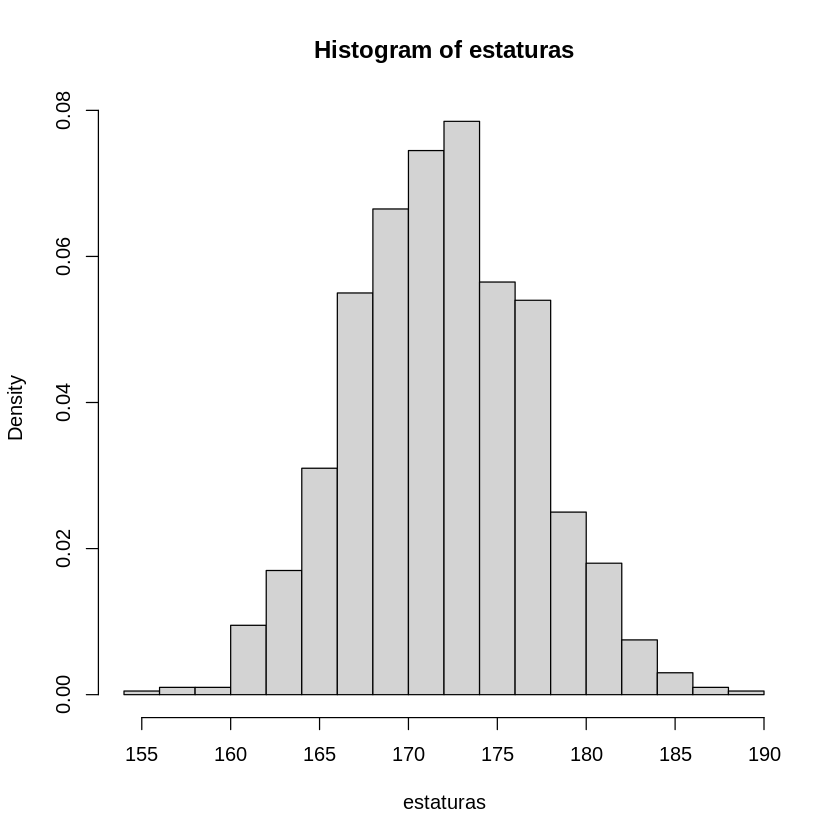

In [25]:
# Notar que en un histograma podemos visualizar los conteos o las frecuencias relativas.
hist(estaturas, freq = F,breaks = 20)


In [26]:
## NOTA
# dnorm() evalúa la función de densidad en el argumento dado
dnorm(1.2, mean = 0, sd = 1) # evaluación de la densidad en el punto 1.2, de una distrib. normal con media 1 y sd 0.


[1] 0.1941861

In [27]:
dnorm(165,mean = 171.8, sd = 5)

[1] 0.03164496

In [31]:
(mu_est <- mean(estaturas))
(sd_est <- sd(estaturas))


[1] 171.8638

[1] 5.096141

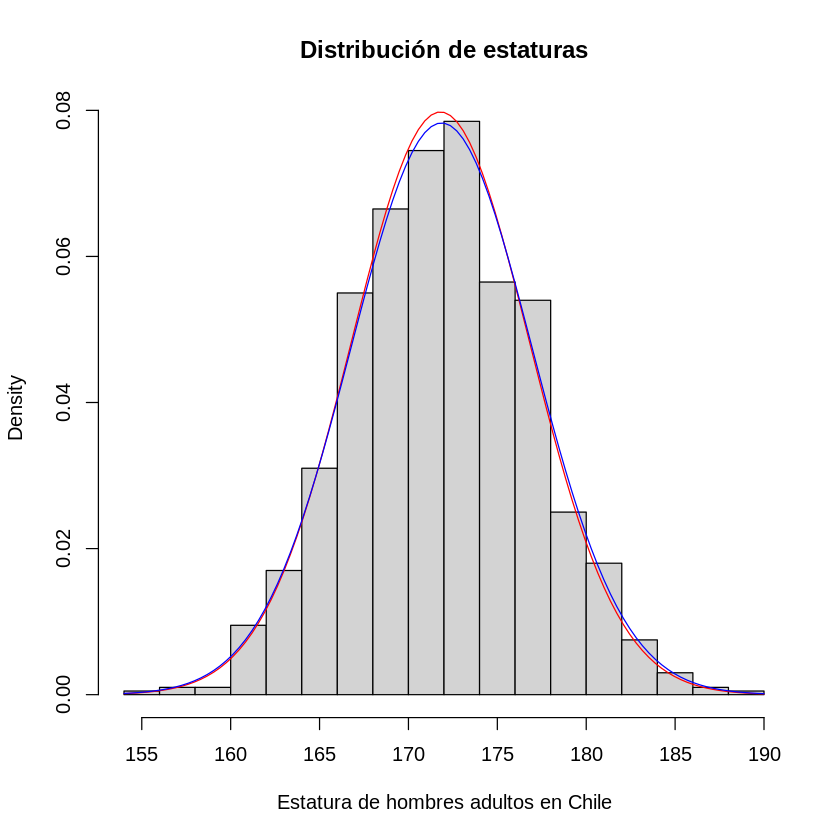

In [34]:
#Histograma de frecuencias relativas con las curvas de la densidad real y la densidad con parámetros estimados
hist(estaturas, freq = F,breaks = 20, main = "Distribución de estaturas", xla = "Estatura de hombres adultos en Chile")
curve(dnorm(x,mean = 171.8, sd = 5), add = T, col = "red")
curve(dnorm(x,mean = mu_est, sd = sd_est), add = T, col = "blue")

In [ ]:
?hist

In [35]:
# Podemos realizar lo mismo con ggplot, aunque con un poco de dificultad adicional
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [36]:
df <- data.frame(est = estaturas)
head(df)

,est
,<dbl>
1,171.1877
2,174.5623
3,173.5432
4,173.5982
5,176.2903
6,162.1872


# Paréntesis: Funciones en R
````
f <- function(...){
  # la lógica de la función
  return(valor)
}
````

In [37]:
suma <- function(a,b){
  s <- a+b
  return(s)
}

In [38]:
suma(1,4)

[1] 5

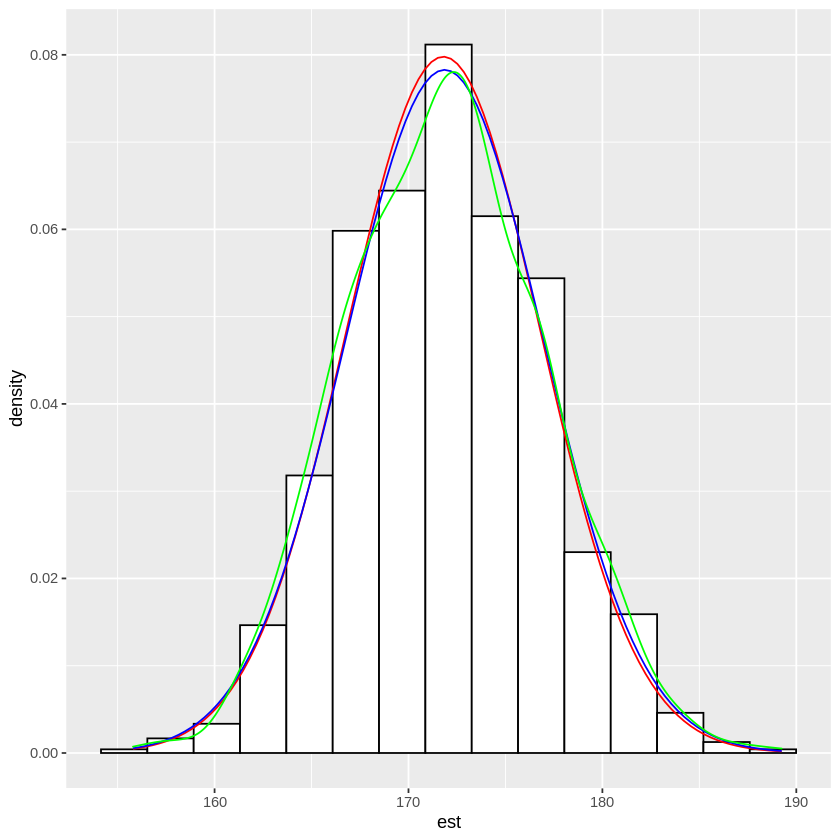

In [42]:
df %>%
  ggplot()+
  aes(x = est) +
  geom_histogram(
    bins = 15,
    color = "black",
    fill = "white",
    aes(y = ..density..)
  ) +
  stat_function(
    fun = function(x){dnorm(x,mean = 171.8, sd = 5)},
    col = "red"
  )+
  stat_function(
    fun = function(x){dnorm(x,mean = mu_est, sd = sd_est)},
    col = "blue"
  ) + 
  geom_density(color = "green") # Ggplot pupede estimar de manera no paramétrica (y sin un supuesto distribucional previo), la densidad de una distribución asociada a una aleatoria.

# II)Distribucion binomial
## Contexto
Cuando una variable aleatoria representa la cantidad de éxitos en $n$ ensayos independientes de tipo Bernoulli (0 o 1), se dice que dicha variable sigue una distribución binomial.

## Función de probabilidad


$$p(x) = {n\choose x}p^x(1-p)^{n-x}$$
Donde $n$ es el total de ensayos realizados y $x$ es la cantidad de éxitos observados y $p$ es la probabilidad de éxito del evento de interés.

## En R...

* `dbinom(x, size, prob, log = FALSE)`: Evalúa la función de masa. En el caso discreto corresponde a la probabilidad del evento.
* `pbinom(q, size, prob, lower.tail = TRUE, log.p = FALSE)`: Calcula la probabilidad acumulada.
* `qbinom(p, size, prob, lower.tail = TRUE, log.p = FALSE)`: Retorna cuantiles de la distribución.
* `rbinom(n, size, prob)`: Genera muestras aleatorias.

**P2.** Suponga que un spot publicitario de un artículo tiene una tasa de efectividad de 20% sobre una determinada población.

**a)** Suponga que se logra llegar con el spot a 100 personas. ¿Cuál es la probabilidad de que 
 al menos 30  personas compren el artículo ofrecido?

In [47]:
# Identifiquemos algunos elementos como
# Experimento : Hacer llegar el spot a las 100 personas y registrar el número de clientes que efectivamente compraron el artículo.
# Variable aleatoria : X: "el número de clientes (de los 100) que compraron el artículo"
# Espacio muestral : {0,1,2,...,100}
#-------parámetros de pbinom ---------
#size (n): 100
#prob (p): 0.2

# Observaciòn sobre P(X >= 30) = 1-P(X < 30) = 1-P(X<=29)


1-pbinom(29, size = 100, prob = 0.2) # P(X >=30) 

pbinom(29, size = 100, prob = 0.2, lower.tail = F)


[1] 0.01124898

[1] 0.01124898

In [53]:
pbinom(30, size = 100, prob = 0.2) # P(X <= 30)
pbinom(29, size = 100, prob = 0.2) # P(X <= 29) = P(X < 30)

[1] 0.9939407

In [54]:
1-pbinom(30, size = 100, prob = 0.2) # P(X > 30) = P(X >= 31)
1-pbinom(29, size = 100, prob = 0.2) # P(X > 29) = P(X >= 30) *

[1] 0.006059335

[1] 0.01124898

In [51]:
# ¿Cuál es la probabilidad de que exactamente 30 personas compren el artículo ofrecido?
dbinom(x = 30,size = 100, prob = 0.2)

# otra alternativa
pbinom(30,size = 100, prob = 0.2) - pbinom(29,size = 100, prob = 0.2)



[1] 0.005189643

[1] 0.005189643

**P3.** En una localidad se sabe que el 70% de las casas tienen un televisor.  Se quiere realizar una encuesta a 8 casas ¿cuál es la probabilidad de que 6 o más de ellas tengan televisor?

In [57]:
# Variable al: X: Total de casas con tv
# size = 8
# prob = 0.7

pbinom(5,size = 8, prob = 0.7, lower.tail = F)

# NOTA:
dbinom(6,size = 8, prob = 0.7) +dbinom(7,size = 8, prob = 0.7)+dbinom(8,size = 8, prob = 0.7)



[1] 0.5517738

[1] 0.5517738

## Lanzando una moneda 
**P4** Supongamos que una **honesta** se lanza 14 veces y se anota el número veces que se obtuvo cara.

**a)** ¿Cuál es la probabilidad de obtener exactamente 4 caras? ¿y al menos 10?

In [59]:
#size = n = 14, y prob = p = 0.5 ?
dbinom(4,size = 14, prob = 0.5)#6% de prob de observar exactamente 4 caras
pbinom(9,size = 14, prob = 0.5, lower.tail = F)# 9% de prob de observar 10 o más caras


[1] 0.06109619

[1] 0.08978271

  
**b)** Si se repite el experimento 5 veces. ¿Qué proporción de caras se debería esperar?¿y si se repite más veces?  Utillice la función rbinom para simular el experimento 1000 veces.

In [81]:
set.seed(2021)

In [82]:
# simulamos un experimento binomial
lanzamientos <- rbinom(n = 1000, size = 14, prob = 0.5)

In [83]:
lanzamientos

[1]  7  8  8  6  8  8  8  6  9 11  3  9  7  7  9  6  7  9 10  7  5 10  6  6
  [25]  7 10 10  9 10  9  4 10 10  9  7  6 10  6 10  7  5  9  7 10  5  9  9  3
  [49]  4  9  7  8  4  7  6  5  7  6  9  8  3  7  4  7  9  5  4  8  6  4  4  8
  [73]  5 10  4  7  7  6  8 12  7  7 10  8  6  6 11  9  7  7  6  8 10  7  6  9
  [97]  8  8  8  8  6  6  3  9  7  6  6  7  5  8  7  5  8  8  7  7  4  6  4  4
 [121]  7  6  7  8  8  6  6  9  7  6  5  6  8  7 10  4  7 10  5  7  6 11  7  6
 [145]  4  7 10  9  5  7  7  4  5  7  4  8  9  6  8  8  6  6  6  7  3  9  8  6
 [169]  7  7  5  8  8  3  4  5  5  5  8  8  9  6  6  8  7  6  8  8  7  6  7  5
 [193]  6  7  5 10  6  7  3  7  7  5  8  9  7  6  6  7  5  5  7  6  7  6  2  5
 [217]  6  4  8 11  8  9  7  8  5  5  7  8  3  7 10  5  8  4 10  6  7  8  4  9
 [241]  8  7  6  4  4  8  3  8 11  7  8  4  9  4  8  7  9  7 11  7  7  5  8  8
 [265]  7  6  3  7  8  6  6  5  8  9  6  9  7  3  7  7  5  8  8  6  2  8  5  6
 [289]  8  6  5  7  7  5  8  6  7  9 10  8  6  5  7  5  5  6  8  7  5  8  6 12
 [313]  6  6  8  7  5  5  6  7  9  8  8  6  7  5  9  8  6  9  6  4  4  9 11  4
 [337] 12 10 11  5  9 10  7  4  6  8  9  6  5  6  9  9  8  7 10  8  6  7  7 10
 [361]  5  5  5 10  8  9  9  8  8  9  7  8 10  8  7  9  8  5  7  4  5  9  7  7
 [385]  9  8  6  7  8  5  4  7  7  4  8  5  7  5  8  6  8  9  4  5  5  7  6  7
 [409]  6  7  7  3  5  7  8  6  7  6  6  6 10  6  8  7  7 11  9  9  9  7  7 11
 [433]  6  8  6  5  5  8  6 10  7  8 10  5  7  7  8  5 11  3  7  9 10  7  8 11
 [457]  7  6  8  7  4  7  4  9 10  8  7 10  9  6  8  4  7  8  7  8  4  6  7  6
 [481] 11  5  9  7  3  5  9  5  9  7  4  5  9  7  6  6  3 10  8  7  7  4  6  8
 [505]  4  4  5  3  8  5  7  4  9  9  4  8  7 10 10  5  5  8  9  7  7  9  9  8
 [529]  6  8  5  7  9  4  7 12  8  8 10  6  5  8  9  6  7  8  8  5  5  7  9  2
 [553]  5 10  7  9  6  6 11  9  7  9  8  7  9 10  8  6  6  8 12  6  7  9  4  7
 [577]  3  5  4  6  7  9  5  4  9  7  5  7  7  4  9  6  7  8  6  7  6  6  6  4
 [601]  9 11  9  7 10  6  8 11  8  4  6  8  6  7  8  4  7  7  4 11  5  6  8  8
 [625]  5  7  7  7  7  7  5  6  6  4  6  5 10  5  8  4  8  6  8  3  7 10  5  5
 [649]  7  9  8  8  7  7  8  5  6  5  8  6  7  7  5  7  4  8  6  7  3  6  9  7
 [673]  5  7  7 10  8  5  7  5  4  7  8  7  4  8  5  5  7  3 10  7  6  3  3  4
 [697]  5  8  4  4  9  8  4  9  9  9  7  7  7  5  9  6  9 11  5  2  7 10  9  4
 [721]  8  6  4  6  5  9  6 11  6  8  7  8  5  8  4 11  8  8  5  2  8  9  6  8
 [745]  7  6  6  4  9  6  8  7  6  8  9  4  6  6  6  6  8  8  7  6  8  7  5  6
 [769]  3  5  7 11  6  4  9  7  7  7  8  4  6  7  4  6  7  6  9  6  5  9  8 10
 [793]  8  9 10  4 11  7  7  9  6  6  7  4  8  8  6  6  9  4  4  8  7  6  9  8
 [817]  8  7  7  6  5  9  6  8  4  8  8  9  6  7 10  7 10  6  7  5  8  7  5  7
 [841]  9  7  8  7  7  9  4  7  9  6  9 10  9  4  9  8 11  5 10  9 10  7  9  7
 [865]  5  9 10  7  6  7 10  5  6  7  6  3  7  7 11  6  7  7  9  7  5  8  7  3
 [889]  7  7  8  9  8  5  8  9  7 10 11 10  9  7  5  9  6  7  7  6  7  6  5  4
 [913]  5  8  8  5  9  8 11  8 10  6  8  8  6  7  7  4  5  4  7  8 10  8  8  7
 [937]  8  5 10 10  7  8  7  8 10  7  7  4  7  8  3  7  8  9  6  6  7  8 11  5
 [961]  7  7  5  7  5  7  6  6 12  8  7  4  6 10  9  4  8  6  5  5  6  7  5  6
 [985]  9  8  7  8  4 10  9  7  9 10 10  6 10  7  7 10

In [84]:
mean(lanzamientos) # Cerca del 50% de los 14 lanzamientos por experimento

[1] 6.973

In [85]:
# podemos construir un gráfico de barras con los conteos
df <- data.frame(caras  = lanzamientos)
head(df)


,caras
,<int>
1,7
2,8
3,8
4,6
5,8
6,8


In [86]:
df %>% 
  count(caras)

caras,n
<int>,<int>
2,5
3,26
4,81
5,115
6,161
7,227
8,172
9,114
10,66


In [91]:
(N <- nrow(df))

[1] 1000

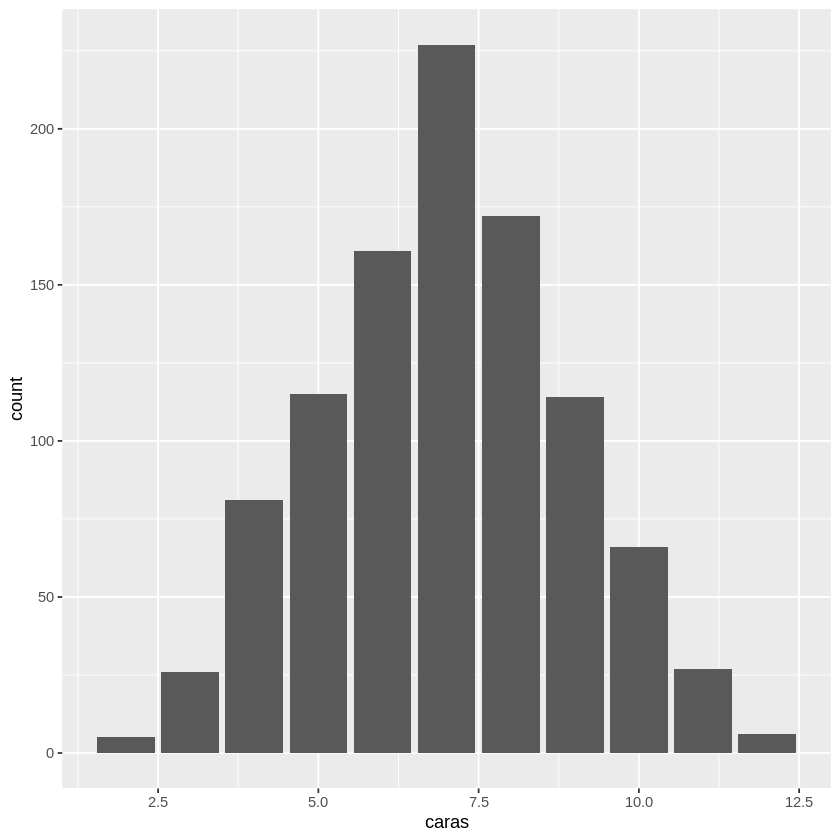

In [93]:
# gráfio ggplot 

df %>% 
    ggplot() +
    aes(x = caras) +
    geom_bar(stat = "count")



In [ ]:
# Tabla con conteos por cada total de caras y sus probabilidades observadas
df %>% 
  group_by(caras) %>%
  summarise(count = n(),
            prob_obs = count/N) 

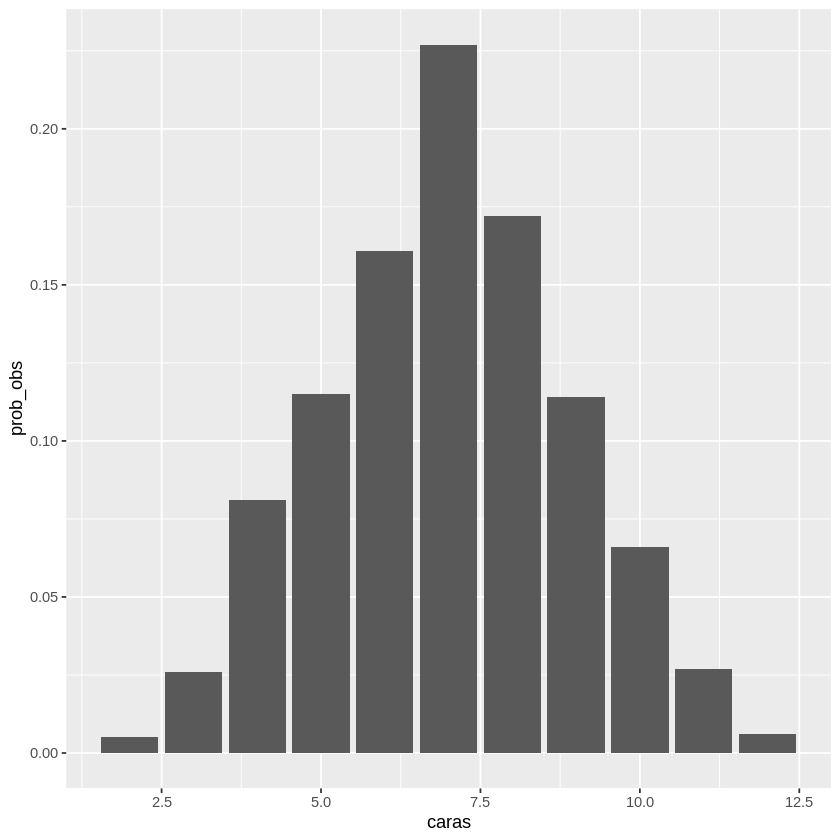

In [97]:
# Frecuencias relativas
df %>% 
  group_by(caras) %>%
  summarise(count = n(),
            prob_obs = count/N) %>%
    ggplot() +
    aes(x = caras, y = prob_obs) +
    geom_bar(stat = "identity")

In [94]:
?geom_bar

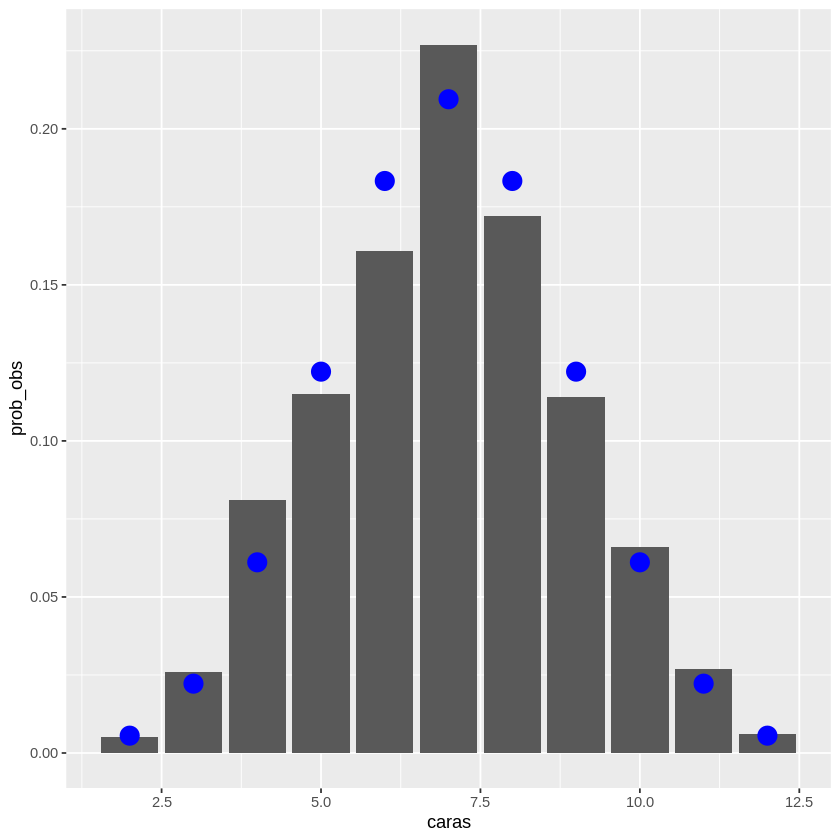

In [104]:
# Pero si queremos visualizar las frecuencias relativas observadas?
# Adicionalmente nos interesaría poder visualizar la función de masa de probabilidad.
df %>% 
  group_by(caras) %>%
  summarise(count = n(),
            prob_obs = count/N) %>%
  mutate(prob_real = dbinom(caras, size = 14, prob = 0.5)) %>%
  ggplot() +
  aes(x = caras, y = prob_obs) +
  geom_bar(stat = "identity") +
  geom_point(aes(y = prob_real), color = "blue", size =5)

# III) Distribución poisson
## Contexto
Usualmente una variable aleatoria poisson, representa la cantidad de eventos registrados en un interval fijo de tiempo con una cierta tasa de ocurrencia.
## Función de probabilidad

$$p(x) = \lambda^x \dfrac{e^{-\lambda}}{x!}$$

Donde $\lambda$ corresponde a la tasa de ocurrencia y $x$ la cantida de eventos observados.

## Funciones en R
 * `dpois(x, lambda, log = FALSE)`
 * `ppois(q, lambda, lower.tail = TRUE, log.p = FALSE)`
 * `qpois(p, lambda, lower.tail = TRUE, log.p = FALSE)`
 * `rpois(n, lambda)`

**P5.** Suponga que en un restaurant de comida se tiene una tasa de llegada de clientes de 2 clientes por cada 3 minutos en promedio. 
¿Cuál es la probabilidad de que 5 o más clientes lleguen en un período de 9 minutos?.


In [108]:
# La tasa de éxito en una dist. poisson es el parámetro lambda 
# Dada la info, se tiene una tasa de 6 clientes cada 9 minutos

# Lambda: 6 lientes cada 9 min

ppois(q = 4, lambda = 6, lower.tail = F)

#71% de prob de que lleguen 5 o más clientes en un período de 9 min



[1] 0.7149435

**P6.** Se sabe que la tasa de falla en la elaboración de ampolletas sigue una distribución poisson, con una tasa de falla de 3 ampolletas defectuosas por semana.
¿Cuál es la probabilidad de que al cabo de un mes se genere un total de 20 ampolletas defectuosas o más?



In [ ]:
# lambda = 3*4 = 12 ampolletas defectuosas por mes

